In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\deepe\OneDrive\Desktop\Python Datasets\Car Dekh"

C:\Users\deepe\OneDrive\Desktop\Python Datasets\Car Dekh


In [3]:
cardata=pd.read_csv("Car details v3.csv")

In [4]:
# About the data
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7640 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [5]:
# Columns of data
cardata.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
cardata.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,NaN,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,4500,5.0


In [7]:
# Finding the missing values percentage in each column
cardata.isnull().sum().sort_values(ascending=False)/cardata.shape[0]

torque           0.060039
mileage          0.027190
engine           0.027190
seats            0.027190
max_power        0.026452
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
dtype: float64

In [8]:
# Creating new column car_age in the data
cardata["car_age"]=2023-cardata.year

In [9]:
# Removing the column year from the data
cardata=cardata.drop(["year"],axis=1)

In [10]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7913 non-null   object 
 10  torque         7640 non-null   object 
 11  seats          7907 non-null   float64
 12  car_age        8128 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [11]:
cardata.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_age'],
      dtype='object')

In [12]:
# Splitting the data into numeric and object columns
numcols=cardata[['car_age' ,'selling_price', 'km_driven','max_power', 'torque','mileage','engine',]]

In [13]:
numcols.describe()
# Here we are not finding the 'max_power' and 'torque' due to the datatypes

,car_age,selling_price,km_driven,mileage,engine
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000
mean,9.195989,6.382718e+05,6.981951e+04,19.418783,1458.625016
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303
min,3.000000,2.999900e+04,1.000000e+00,0.000000,624.000000
25%,6.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000
50%,8.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000
75%,12.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000
max,40.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000


In [14]:
numcols['torque']=pd.to_numeric(numcols.torque,errors='coerce')

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\3664150394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols['torque']=pd.to_numeric(numcols.torque,errors='coerce')


In [15]:
numcols['max_power']=pd.to_numeric(numcols.max_power,errors='coerce')

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\3198012263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols['max_power']=pd.to_numeric(numcols.max_power,errors='coerce')


In [16]:
numcols.describe()
# here we are finding the 'max_power' and 'torque' by changing the data type

,car_age,selling_price,km_driven,max_power,torque,mileage,engine
count,8128.000000,8.128000e+03,8.128000e+03,7912.000000,7634.000000,7907.000000,7907.000000
mean,9.195989,6.382718e+05,6.981951e+04,91.517919,3089.943673,19.418783,1458.625016
std,4.044249,8.062534e+05,5.655055e+04,35.822499,923.452758,4.037145,503.916303
min,3.000000,2.999900e+04,1.000000e+00,0.000000,500.000000,0.000000,624.000000
25%,6.000000,2.549990e+05,3.500000e+04,68.050000,2500.000000,16.780000,1197.000000
50%,8.000000,4.500000e+05,6.000000e+04,82.000000,3000.000000,19.300000,1248.000000
75%,12.000000,6.750000e+05,9.800000e+04,102.000000,4000.000000,22.320000,1582.000000
max,40.000000,1.000000e+07,2.360457e+06,400.000000,21800.000000,42.000000,3604.000000


In [17]:
objcols=cardata[['fuel', 'seller_type','seats','transmission', 'owner']]

In [18]:
# missing values in numcols
numcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

torque           0.060778
mileage          0.027190
engine           0.027190
max_power        0.026575
car_age          0.000000
selling_price    0.000000
km_driven        0.000000
dtype: float64

In [19]:
# fill in the missing values by using the median 
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\2985587695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].median())


In [20]:
# finding the frequency of objcols and finding the missing values
for col in objcols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
5.0     6254
7.0     1120
8.0      236
NaN      221
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64
Manual       7078
Automatic    1050
Name: transmission, dtype: int64
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


In [21]:
# Merging of the levels due to very few no.
objcols.fuel=objcols.fuel.replace(["Petrol","CNG","LPG"],"PCL")

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\2720792656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols.fuel=objcols.fuel.replace(["Petrol","CNG","LPG"],"PCL")


In [22]:
objcols.seats=objcols.seats.replace([4.0,9.0,6.0,10.0,2.0,14.0],24691014)

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\992892221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols.seats=objcols.seats.replace([4.0,9.0,6.0,10.0,2.0,14.0],24691014)


In [23]:
objcols.owner=objcols.owner.replace(["Third Owner","Fourth & Above Owner","Test Drive Car"],"3&4 Test")

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\1184832894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols.owner=objcols.owner.replace(["Third Owner","Fourth & Above Owner","Test Drive Car"],"3&4 Test")


In [24]:
objcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

seats           0.02719
fuel            0.00000
seller_type     0.00000
transmission    0.00000
owner           0.00000
dtype: float64

In [25]:
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\1716936729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\1716936729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\1716936729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [26]:
# combining the numcols and objcols
cardatadf=pd.concat([numcols,objcols],axis=1)

In [27]:
cardatadf.columns

Index(['car_age', 'selling_price', 'km_driven', 'max_power', 'torque',
       'mileage', 'engine', 'fuel', 'seller_type', 'seats', 'transmission',
       'owner'],
      dtype='object')

In [28]:
# EDA 
# average selling price of fuel
cardatadf.selling_price.groupby(cardatadf.fuel).mean()

fuel
Diesel    791452.921627
PCL       457299.380569
Name: selling_price, dtype: float64

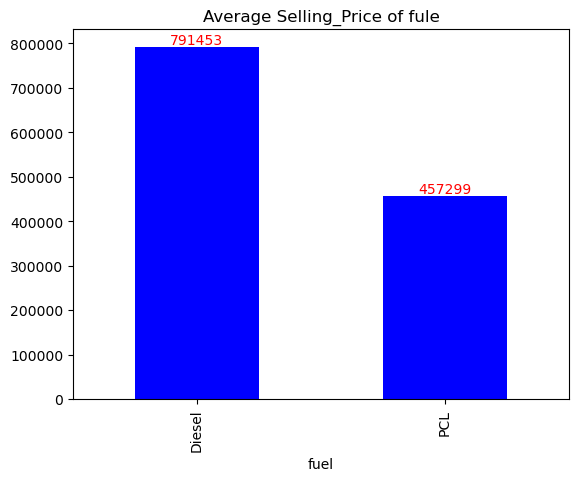

In [29]:
ax=cardatadf.selling_price.groupby(cardatadf.fuel).mean().plot(kind="bar",color="blue",title="Average Selling_Price of fule")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="Red")

<Axes: ylabel='selling_price'>

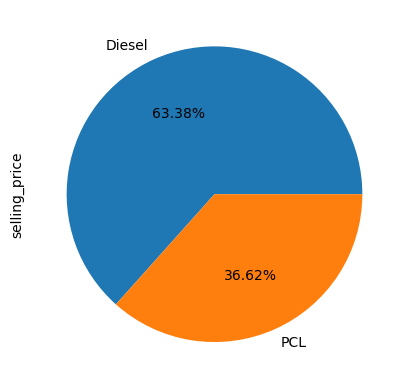

In [30]:
cardatadf.selling_price.groupby(cardatadf.fuel).mean().plot(kind="pie",autopct="%.2f%%")

In [31]:
#  Average selling_price of seller-type
cardatadf.selling_price.groupby(cardatadf.seller_type).mean()

seller_type
Dealer              1.443494e+06
Individual          4.985612e+05
Trustmark Dealer    8.018390e+05
Name: selling_price, dtype: float64

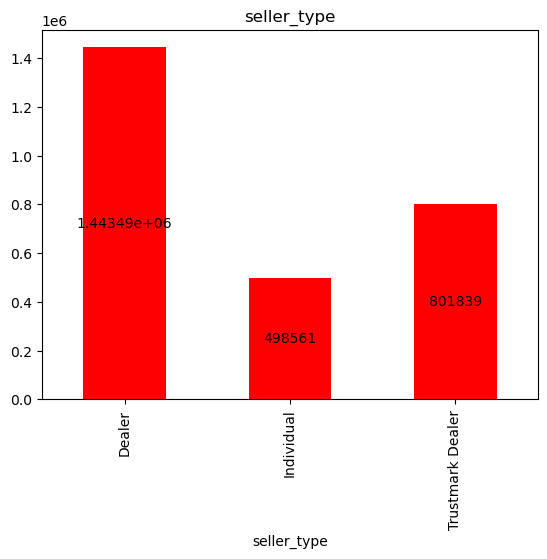

In [32]:
ax=cardatadf.selling_price.groupby(cardatadf.seller_type).mean().plot(kind="bar",color="red",title="seller_type")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="black",label_type="center")

<Axes: ylabel='selling_price'>

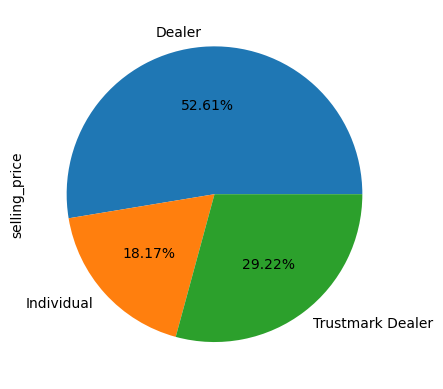

In [33]:
cardatadf.selling_price.groupby(cardatadf.seller_type).mean().plot(kind="pie",autopct="%.2f%%")

In [34]:
# Average selling_price of transmission
cardatadf.selling_price.groupby(cardatadf.transmission).mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

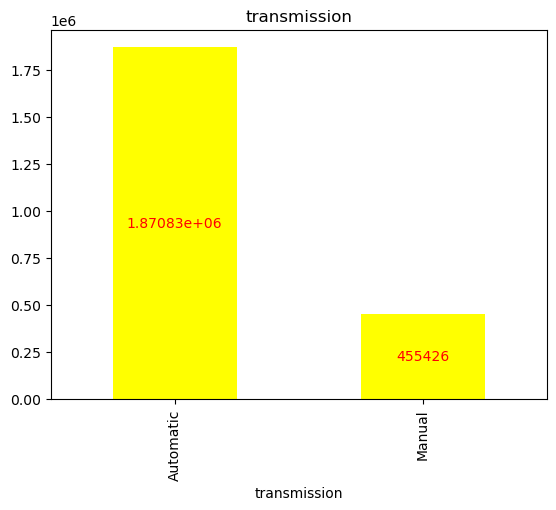

In [35]:
ax=cardatadf.selling_price.groupby(cardatadf.transmission).mean().plot(kind="bar",color="yellow",title="transmission")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="red",label_type="center")

<Axes: ylabel='selling_price'>

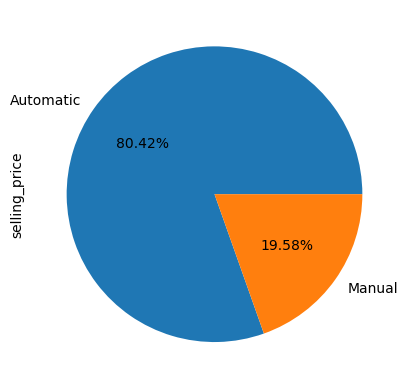

In [36]:
cardatadf.selling_price.groupby(cardatadf.transmission).mean().plot(kind="pie",autopct="%.2f%%")

In [37]:
# Average selling_price of owner
cardatadf.selling_price.groupby(cardatadf.owner).mean()

owner
3&4 Test        298282.017711
First Owner     783086.414445
Second Owner    392964.468409
Name: selling_price, dtype: float64

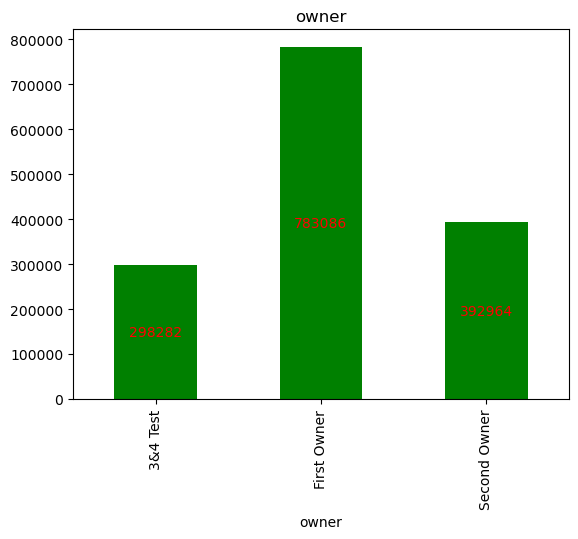

In [38]:
ax=cardatadf.selling_price.groupby(cardatadf.owner).mean().plot(kind="bar",color="green",title="owner")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="red",label_type="center")

<Axes: ylabel='selling_price'>

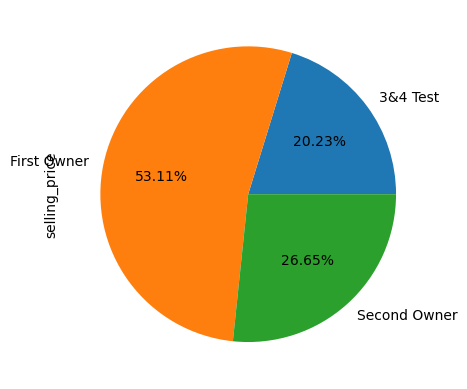

In [39]:
cardatadf.selling_price.groupby(cardatadf.owner).mean().plot(kind="pie",autopct="%.2f%%")

In [40]:
# Average selling_price of seats
cardatadf.selling_price.groupby(cardatadf.seats).mean()

seats
5.0           616318.857606
7.0           812923.184821
8.0           583711.826271
24691014.0    501611.757576
Name: selling_price, dtype: float64

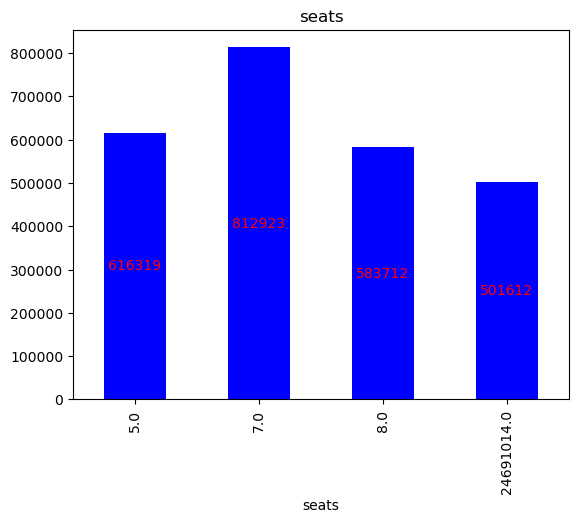

In [41]:
ax=cardatadf.selling_price.groupby(cardatadf.seats).mean().plot(kind="bar",color="blue",title="seats")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="red",label_type="center")

<Axes: ylabel='selling_price'>

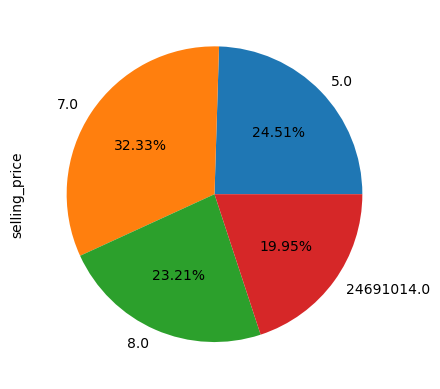

In [42]:
cardatadf.selling_price.groupby(cardatadf.seats).mean().plot(kind="pie",autopct="%.2f%%")

In [43]:
# avg maileage of fule
cardatadf.mileage.groupby(cardatadf.fuel).mean()

fuel
Diesel    19.634607
PCL       19.156758
Name: mileage, dtype: float64

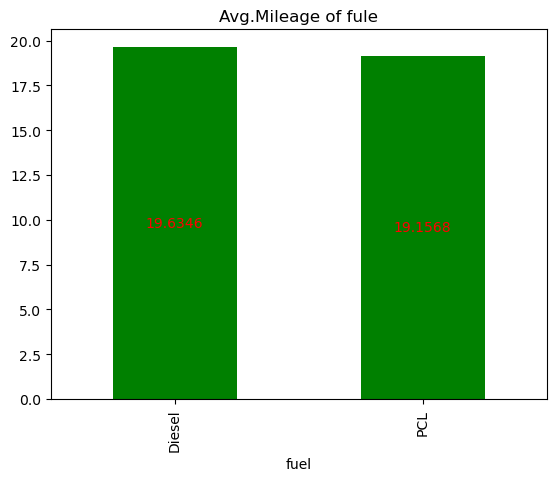

In [44]:
ax=cardatadf.mileage.groupby(cardatadf.fuel).mean().plot(kind="bar",color="green",title="Avg.Mileage of fule")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="red",label_type="center")

<Axes: ylabel='mileage'>

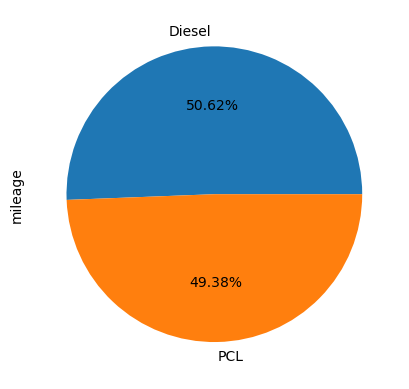

In [45]:
cardatadf.mileage.groupby(cardatadf.fuel).mean().plot(kind="pie",autopct="%.2f%%")

In [46]:
# what is avg engine of transmission
cardatadf.engine.groupby(cardatadf.transmission).mean()

transmission
Automatic    1820.206667
Manual       1398.409014
Name: engine, dtype: float64

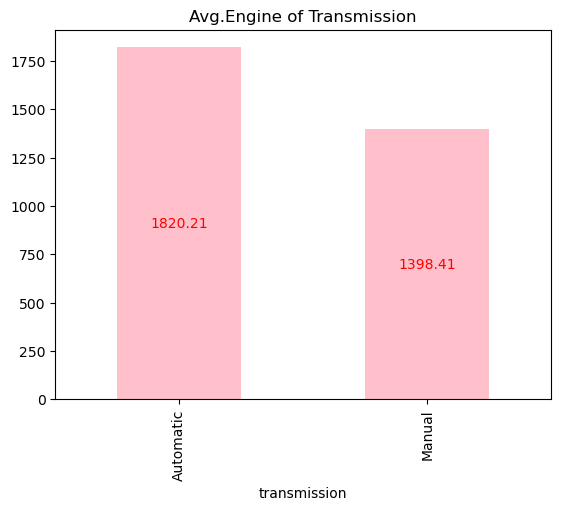

In [47]:
ax=cardatadf.engine.groupby(cardatadf.transmission).mean().plot(kind="bar",color="pink",title="Avg.Engine of Transmission")
for i in ax.containers:
 ax.bar_label(i,fontsize=10,color="red",label_type="center")

<Axes: ylabel='engine'>

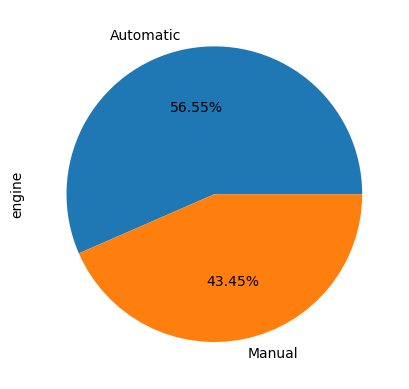

In [48]:
cardatadf.engine.groupby(cardatadf.transmission).mean().plot(kind="pie",autopct="%.2f%%")

In [49]:
# correlation
cardatadf.corr()

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\1947867239.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cardatadf.corr()


,car_age,selling_price,km_driven,max_power,torque,mileage,engine,seats
car_age,1.000000,-0.414092,0.418006,-0.224704,-0.073480,-0.311657,-0.035851,0.132600
selling_price,-0.414092,1.000000,-0.225534,0.747935,-0.034770,-0.125040,0.458345,-0.033012
km_driven,0.418006,-0.225534,1.000000,-0.040599,-0.206214,-0.171746,0.198911,0.014551
max_power,-0.224704,0.747935,-0.040599,1.000000,-0.010493,-0.372897,0.703612,-0.107845
torque,-0.073480,-0.034770,-0.206214,-0.010493,1.000000,-0.186292,-0.178529,-0.124052
mileage,-0.311657,-0.125040,-0.171746,-0.372897,-0.186292,1.000000,-0.574128,-0.104514
engine,-0.035851,0.458345,0.198911,0.703612,-0.178529,-0.574128,1.000000,0.053855
seats,0.132600,-0.033012,0.014551,-0.107845,-0.124052,-0.104514,0.053855,1.000000


In [50]:
import seaborn as sns

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\680232014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cardatadf.corr(),annot=True,cmap="inferno",linecolor="black",linewidths=0.5)


<Axes: >

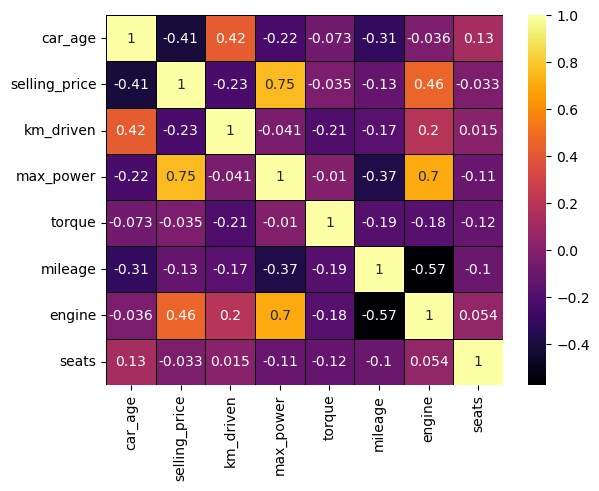

In [51]:
sns.heatmap(data=cardatadf.corr(),annot=True,cmap="inferno",linecolor="black",linewidths=0.5)

In [52]:
# Relation between selling_price and max_power
cardatadf[["selling_price","max_power"]].corr()

,selling_price,max_power
selling_price,1.000000,0.747935
max_power,0.747935,1.000000


<Axes: xlabel='selling_price', ylabel='max_power'>

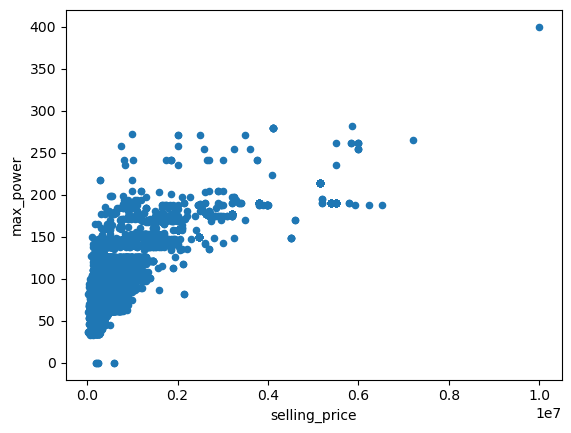

In [53]:
cardatadf.plot(x="selling_price",y="max_power",kind="scatter")

In [54]:
# Relation between age_car and km_driven
cardatadf[["car_age","km_driven"]].corr()

,car_age,km_driven
car_age,1.000000,0.418006
km_driven,0.418006,1.000000


<Axes: xlabel='car_age', ylabel='km_driven'>

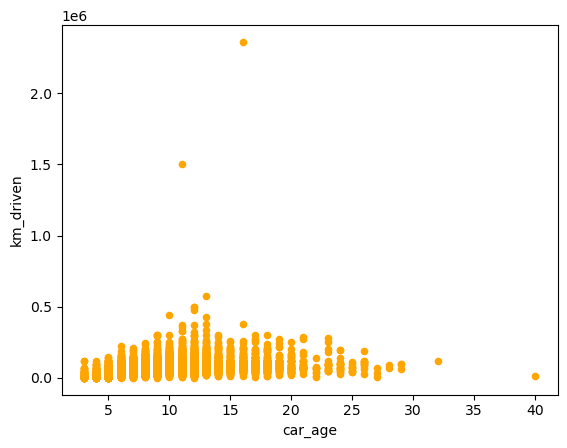

In [55]:
cardatadf.plot(x="car_age",y="km_driven",kind="scatter",color="orange")

In [56]:
# Hypothis Testing
from scipy.stats import ttest_ind

In [57]:
cardatadf.selling_price.groupby(cardatadf.transmission).mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

In [58]:
# Spliting data
transmissionA=cardatadf[cardatadf.transmission=="Automatic"]
transmissionM=cardatadf[cardatadf.transmission=="Manual"]

In [59]:
ttest_ind(transmissionA.selling_price,transmissionM.selling_price,equal_var=False)

Ttest_indResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129)

In [60]:
# What is null avg. Selling_price and fule
cardatadf.selling_price.groupby(cardatadf.fuel).mean()

fuel
Diesel    791452.921627
PCL       457299.380569
Name: selling_price, dtype: float64

In [61]:
fuleDiesel=cardatadf[cardatadf.fuel=="Diesel"]
fulePCL=cardatadf[cardatadf.fuel=="PCL"]

In [62]:
ttest_ind(fuleDiesel.selling_price,fulePCL.selling_price,equal_var=False)

Ttest_indResult(statistic=19.618295786057498, pvalue=1.1099823034116554e-83)

In [63]:
from scipy.stats import f_oneway

In [64]:
cardatadf.selling_price.groupby(cardatadf.seats).mean()

seats
5.0           616318.857606
7.0           812923.184821
8.0           583711.826271
24691014.0    501611.757576
Name: selling_price, dtype: float64

In [65]:
seats5=cardatadf[cardatadf.seats==5.0]
seats7=cardatadf[cardatadf.seats==7.0]
seats8=cardatadf[cardatadf.seats==8.0]
seats24=cardatadf[cardatadf.seats==24691014.0]

In [66]:
f_oneway(seats5.selling_price,seats7.selling_price,seats8.selling_price,seats24.selling_price)

F_onewayResult(statistic=22.50039628849741, pvalue=1.6749292345739754e-14)

In [67]:
cardatadf.selling_price.groupby(cardatadf.seller_type).mean()

seller_type
Dealer              1.443494e+06
Individual          4.985612e+05
Trustmark Dealer    8.018390e+05
Name: selling_price, dtype: float64

In [68]:
dea=cardatadf[cardatadf.seller_type=="Dealer"]
ind=cardatadf[cardatadf.seller_type=="Individual"]
tru=cardatadf[cardatadf.seller_type=="Trustmark Dealer"]

In [69]:
f_oneway(dea.selling_price,ind.selling_price,tru.selling_price)

F_onewayResult(statistic=799.2183234565078, pvalue=1.3789446e-317)

In [70]:
# Cross Tabulation
# Test null no Association between seller_type and seats
pd.crosstab(cardatadf.seller_type,cardatadf.seats)

seats,5.0,7.0,8.0,24691014.0
seller_type,,,,
Dealer,987,107,17,15
Individual,5283,982,219,282
Trustmark Dealer,205,31,0,0


In [71]:
from scipy.stats import chi2_contingency

In [72]:
chi2_contingency(pd.crosstab(cardatadf.seller_type,cardatadf.seats))

Chi2ContingencyResult(statistic=77.45365977478873, pvalue=1.198296792022145e-14, dof=6, expected_freq=array([[ 897.00418307,  155.15748031,   32.69389764,   41.14443898],
       [5389.9913878 ,  932.32283465,  196.45374016,  247.2320374 ],
       [ 188.00442913,   32.51968504,    6.8523622 ,    8.62352362]]))

In [73]:
# Test null no Association between seller_type and Transmission
pd.crosstab(cardatadf.seller_type,cardatadf.transmission)

transmission,Automatic,Manual
seller_type,,
Dealer,459,667
Individual,492,6274
Trustmark Dealer,99,137


In [74]:
chi2_contingency(pd.crosstab(cardatadf.seller_type,cardatadf.transmission))

Chi2ContingencyResult(statistic=1144.671970176008, pvalue=2.7393017920647704e-249, dof=2, expected_freq=array([[ 145.4601378 ,  980.5398622 ],
       [ 874.05265748, 5891.94734252],
       [  30.48720472,  205.51279528]]))

In [75]:
cardatadf.selling_price.kurt()

21.081289012186755

In [76]:
cardatadf.selling_price.skew()

4.193533440675855

<Axes: >

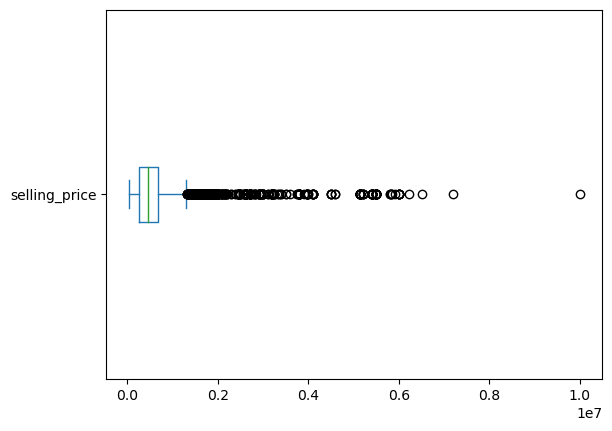

In [77]:
cardatadf.selling_price.plot(kind="box",vert=False)

<Axes: ylabel='Density'>

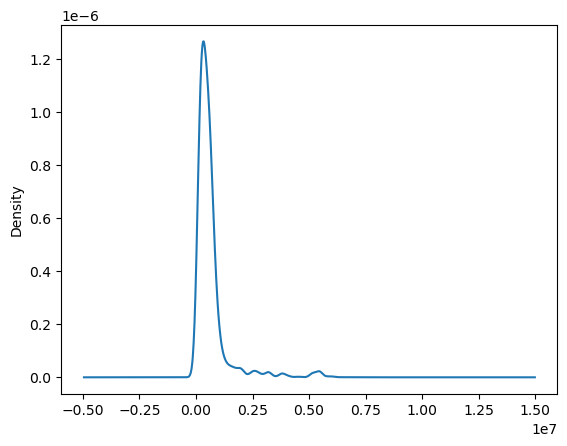

In [78]:
cardatadf.selling_price.plot(kind="density")

<Axes: ylabel='Frequency'>

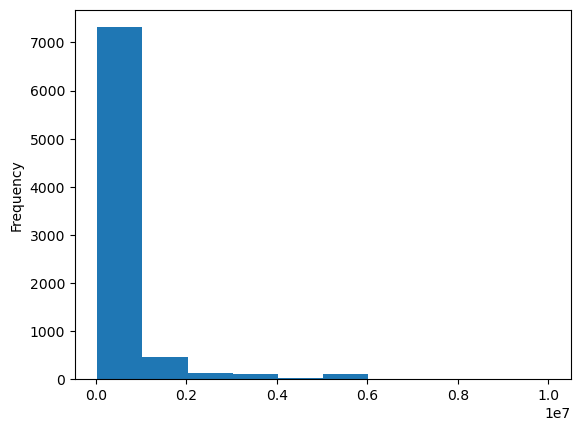

In [79]:
cardatadf.selling_price.plot(kind="hist")

<Axes: ylabel='Density'>

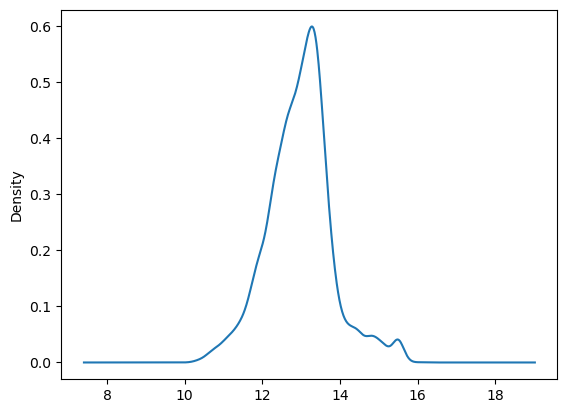

In [80]:
np.log(cardatadf.selling_price).plot(kind='density')

In [81]:
 # Here we are dropping the dependent variable
numcols=numcols.drop(["selling_price"],axis=1)

In [82]:
numcols.head()

,car_age,km_driven,max_power,torque,mileage,engine
0,9,145500,74.00,2000.0,23.40,1248.0
1,9,120000,103.52,2500.0,21.14,1498.0
2,17,140000,78.00,2700.0,17.70,1497.0
3,13,127000,90.00,3000.0,23.00,1396.0
4,16,120000,88.20,4500.0,16.10,1298.0


In [83]:
# Dummy Encoding and Scaling
from sklearn.preprocessing import StandardScaler

In [84]:
car_stdsca=StandardScaler()

In [85]:
numcols_stdsc=car_stdsca.fit_transform(numcols)

In [86]:
numcols_stdsc=pd.DataFrame(numcols_stdsc,columns=numcols.columns)

In [87]:
numcols_stdsc.head()

,car_age,km_driven,max_power,torque,mileage,engine
0,-0.048464,1.338363,-0.488067,-1.211504,1.000696,-0.411305
1,-0.048464,0.887411,0.346439,-0.652938,0.433095,0.090536
2,1.929775,1.241098,-0.374990,-0.429512,-0.430862,0.088528
3,0.940656,1.011202,-0.035760,-0.094372,0.900235,-0.114215
4,1.682495,0.887411,-0.086645,1.581325,-0.832703,-0.310937


In [88]:
from sklearn.preprocessing import RobustScaler

In [89]:
car_rus=RobustScaler()

In [90]:
numcols_Rus=car_rus.fit_transform(numcols)

In [91]:
numcols_Rus=pd.DataFrame(numcols_Rus,columns=numcols.columns)

In [92]:
numcols_Rus.head()

,car_age,km_driven,max_power,torque,mileage,engine
0,0.166667,1.357143,-0.241327,-0.666667,0.748517,0.000000
1,0.166667,0.952381,0.649170,-0.333333,0.335920,0.649351
2,1.500000,1.269841,-0.120664,-0.200000,-0.292104,0.646753
3,0.833333,1.063492,0.241327,0.000000,0.675491,0.384416
4,1.333333,0.952381,0.187029,1.000000,-0.584208,0.129870


In [93]:
objcols.columns

Index(['fuel', 'seller_type', 'seats', 'transmission', 'owner'], dtype='object')

In [94]:
objcols_dummy=pd.get_dummies(objcols,columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

In [95]:
objcols_dummy.head()

,fuel_Diesel,fuel_PCL,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_3&4 Test,owner_First Owner,owner_Second Owner,seats_5.0,seats_7.0,seats_8.0,seats_24691014.0
0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
1,1,0,0,1,0,0,1,0,0,1,1,0,0,0
2,0,1,0,1,0,0,1,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [96]:
car_clean_data=pd.concat([numcols_stdsc,objcols_dummy,cardatadf.selling_price],axis=1)

In [97]:
car_clean_data.shape

(8128, 21)

In [98]:
# split data X=car_claen_data
X=car_clean_data.drop("selling_price",axis=1)
y=car_clean_data.selling_price

In [99]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [100]:
le=LinearRegression()

In [101]:
leregmodel=le.fit(X,y)

In [102]:
leregmodel.score(X,y)

0.6886651745932868

In [103]:
predict=leregmodel.predict(X)

In [104]:
pd.DataFrame(np.exp(predict)).to_csv("reg.csv")

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\2257968620.py:1: RuntimeWarning: overflow encountered in exp
  pd.DataFrame(np.exp(predict)).to_csv("reg.csv")


In [105]:
leregmodel=le.fit(X,np.log(y))

In [106]:
leregmodel.score(X,np.log(y))

0.8685987228220362

In [107]:
predict=leregmodel.predict(X)

In [108]:
pd.DataFrame(np.exp(predict)).to_csv("reglog.csv")

In [109]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [110]:
DTR=DecisionTreeRegressor(max_depth=4)

In [111]:
DTR_model=DTR.fit(X,y)

In [112]:
DTR_model.score(X,y)

0.9035585844165369

In [113]:
predict1=DTR_model.predict(X)

In [114]:
pd.DataFrame(np.exp(predict1)).to_csv("cardtr.csv")

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\4088083815.py:1: RuntimeWarning: overflow encountered in exp
  pd.DataFrame(np.exp(predict1)).to_csv("cardtr.csv")


In [115]:
DTR_model=DTR.fit(X,np.log(y))

In [116]:
DTR_model.score(X,np.log(y))

0.8170200025834815

In [117]:
predict1=DTR_model.predict(X)

In [118]:
pd.DataFrame(np.exp(predict1)).to_csv("cardtrlog.csv")

In [119]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [120]:
RFR=RandomForestRegressor(n_estimators=2000)

In [121]:
RFR_model=RFR.fit(X,y)

In [122]:
RFR_model.score(X,y)

0.9956802695767057

In [123]:
predict2=RFR_model.predict(X)

In [124]:
pd.DataFrame(np.exp(predict2)).to_csv("car_random.csv")

C:\Users\deepe\AppData\Local\Temp\ipykernel_13108\3624464597.py:1: RuntimeWarning: overflow encountered in exp
  pd.DataFrame(np.exp(predict2)).to_csv("car_random.csv")


In [125]:
RFR_model=RFR.fit(X,np.log(y))

In [126]:
RFR_model.score(X,np.log(y))

0.9902514165617993

In [127]:
predict2=RFR_model.predict(X)

In [128]:
pd.DataFrame(np.exp(predict2)).to_csv("car_randomlog.csv")